In [1]:
#!/usr/bin/env python
# coding: utf-8
# # Esben Pedersen & Toti Larson
# # 5/26/2020
# # # # # # # # # # # # # # # # # #

# For data handling and plotting
import numpy as np                # Computation
import pandas as pd               # Data handling
import matplotlib.pyplot as plt   # Plotting
import seaborn as sns; sns.set()  # Plot styling

# For the machine learning library (We will use the K-means and PCA modules)
from sklearn import decomposition                # 
from sklearn.decomposition import PCA            # PCA toolkit
from sklearn.cluster import KMeans               # K-means toolkit
from sklearn import datasets                     #
from sklearn.preprocessing import StandardScaler # For Standardizing features

# For Elbow visualization and statistical identification
from yellowbrick.cluster import KElbowVisualizer

# For Silhouette visualization and statistical identification
from yellowbrick.cluster import SilhouetteVisualizer

# For outlining text on plots for more visible contrast
import matplotlib.patheffects as PathEffects


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# # Data importation and pre-proccessing

#import csv files from core. A lot of room for improvement here.
dataimport = r'C:\Users\Esben Pedersen\Documents\UT Austin\MS Thesis\Geochem\Data\LazyA.csv'
LOD_T5 = r'C:\Users\Esben Pedersen\Documents\UT Austin\MS Thesis\Geochem\Data\T5iLOD.csv'

#convert imported files to dataframes. The idea is to not change the original files
coredata = pd.read_csv(dataimport)

LODT5 = pd.read_csv(LOD_T5)
coredata.sort_values(by = ['Depth_calculated']) # Orders coredata by depth
elements = ['Na', 'Mg', 'Al', 'Si', 'P', 'S', 'K', 'Ca', 'Ti','Mn', 'Fe', 'Ba',
            'V', 'Cr', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'As', 'Pb','Se', 'Th', 'Rb',
            'U', 'Sr', 'Y', 'Zr', 'Nb', 'Mo']

# Add LOD to each element
coredata[elements]=np.maximum(coredata[elements],LODT5)

# vector of the outlier values for each element
Element_outlier=(coredata[elements]).mean()+4*(coredata[elements]).std() # toggle 3 or 4 to decide if enough outliers are selected
coredata['Outliers']=((coredata[elements])>Element_outlier).any(axis='columns') # makes a new column based on above conditional format

coredata.head()

,Lease_Name,Top_Depth,Core,Box,Inch,Depth_calculated,XRF_adjusted_depth,Na,Mg,Al,...,DOLOMITE,Fe_DOLOMITE,PYRITE,FLUORAPATITE,TOTAL CLAY,Average_UCS_MPa,notes,chlorite,as received pressure decay perm (mD),Outliers
0,Lazy A Cotulla,7534.0,C04,B02,1,7534.08,7534.08,0.08,0.42,1.22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1,Lazy A Cotulla,7534.0,C04,B02,3,7534.25,7534.25,0.08,0.57,1.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2,Lazy A Cotulla,7534.0,C04,B02,5,7534.42,7534.42,0.35,0.52,1.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3,Lazy A Cotulla,7534.0,C04,B02,7,7534.58,7534.58,0.72,0.96,6.43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
4,Lazy A Cotulla,7534.0,C04,B02,9,7534.75,7534.75,0.47,0.95,5.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


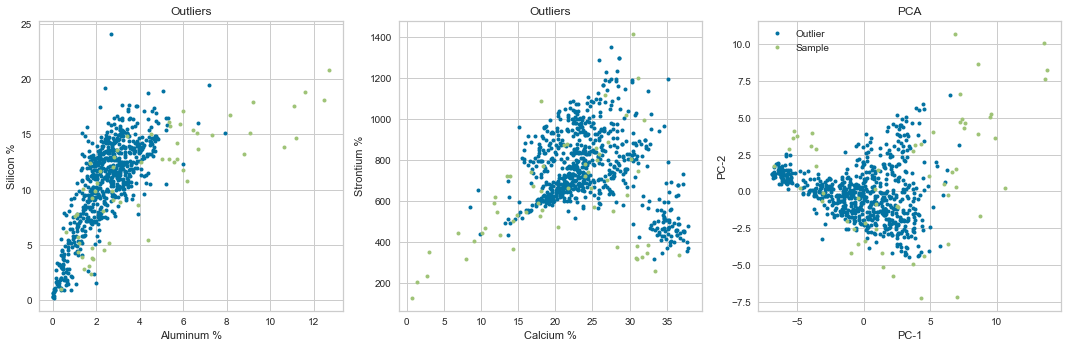

In [3]:
fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(15,5))
plt.subplot(1, 3, 1)
groups = coredata.groupby("Outliers")
for name, group in groups:
    plt.plot(group["Al"], group["Si"], marker="o",  ms=4, linestyle="", label=name)
plt.title('Outliers')
plt.xlabel('Aluminum %')
plt.ylabel('Silicon %')
plt.tight_layout()

plt.subplot(1, 3, 2)
groups = coredata.groupby("Outliers")
for name, group in groups:
    plt.plot(group["Ca"], group["Sr"], marker="o",  ms=4, linestyle="", label=name)
plt.title('Outliers')
plt.xlabel('Calcium %')
plt.ylabel('Strontium %')
plt.tight_layout()

# Principal Component Analysis
pca = decomposition.PCA(n_components=len(elements))#toggle n_components
# Centered (mean = zero X - X.mean(axis=0)) and with unit variance
X = coredata 
y = coredata.Outliers.values
X = X[elements].values
X_centered = StandardScaler().fit(X).transform(X)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)

plt.subplot(1, 3, 3)
plt.plot(X_pca[y == False, 0], X_pca[y == False, 1],marker="o", label='Outlier', ms=4, linestyle="")
plt.plot(X_pca[y == True, 0], X_pca[y == True, 1], marker="o", label='Sample', ms=4, linestyle="")

plt.title('PCA')
plt.xlabel('PC-1')
plt.ylabel('PC-2')
plt.legend()
plt.tight_layout()



In [4]:
# # Outlier Handling
X = (coredata[coredata['Outliers'] == False]) # excludes outliers
x = X[elements].values # all elements
df_segmentation = x

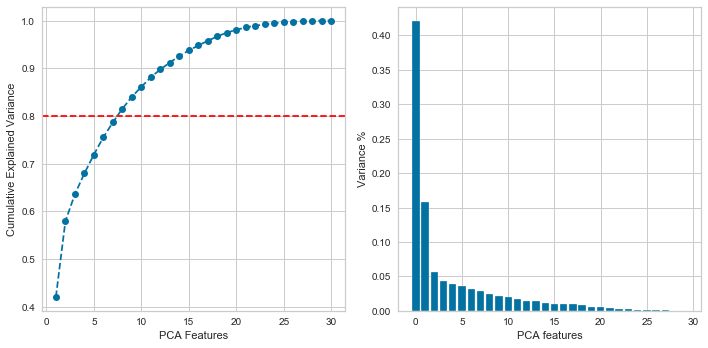

In [5]:
# # 
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_segmentation)
pca = PCA();
pca.fit(segmentation_std);

# The attribute shows how much variance is explained by each of the individual components
pca.explained_variance_ratio_;
comp_num = len(pca.explained_variance_ratio_);
features= np.arange(len(elements))

fig, ((ax4, ax5)) = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(range(1,(comp_num + 1)), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.axhline(y=0.8, color='red', linestyle = '--')
plt.xlabel('PCA Features')
plt.ylabel('Cumulative Explained Variance')
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.bar(features, pca.explained_variance_ratio_, color='b')
plt.xlabel('PCA features')
plt.ylabel('Variance %')
plt.tight_layout()

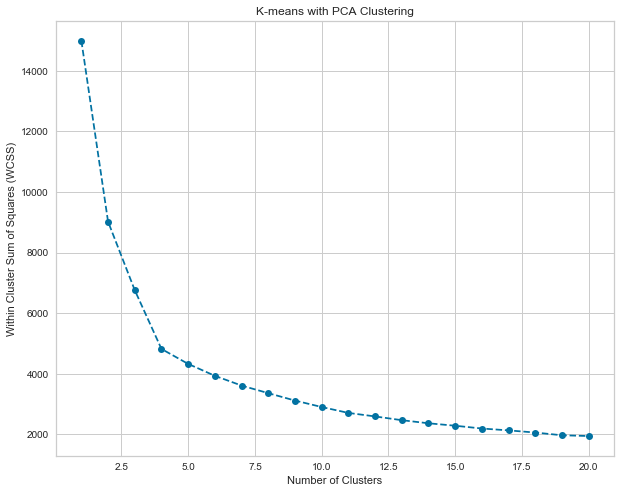

In [6]:
# Choose number of components that capture ~80% of the variance (From above graph)
pca = PCA(n_components = 5)

# Fit the model
pca.fit(segmentation_std)

# Calculated resulting components scores
pca.transform(segmentation_std);

# Calculated resulting components scores
scores_pca = pca.transform(segmentation_std)

# Fit K-means using the transformed data from our PCA steps
wcss = []
for i in range(1,21):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)
    
plt.figure(figsize = (10,8))
plt.plot(range(1,21), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares (WCSS)')
plt.title('K-means with PCA Clustering')
plt.show()

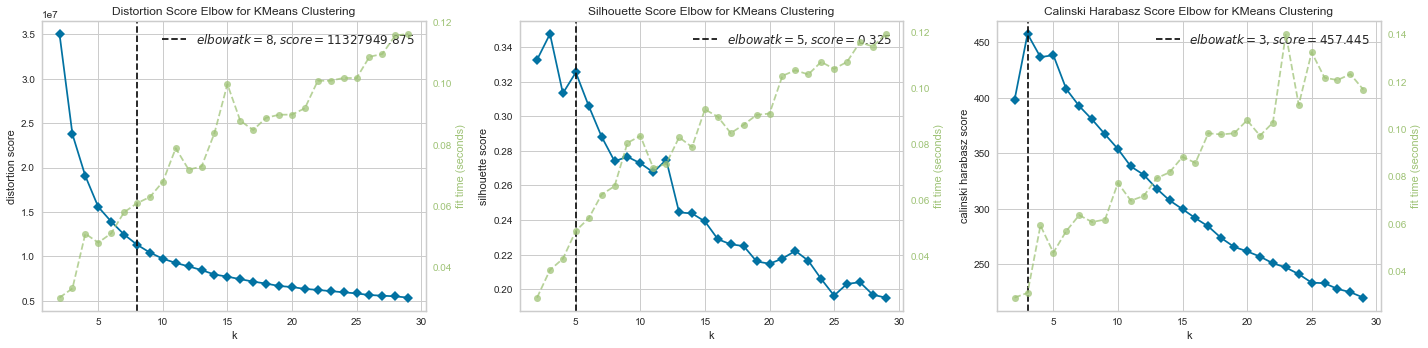

In [7]:
# # Elbow visualization and statistical identification
fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

# Distortion Method
plt.subplot(1, 3, 1)
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,30), metric='distortion')
visualizer.fit(df_segmentation)     # Fit the data to the visualizer
visualizer.finalize()
plt.tight_layout()


# Silhouette Method
plt.subplot(1, 3, 2)
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,30), metric='silhouette')
visualizer.fit(df_segmentation)     # Fit the data to the visualizer
visualizer.finalize()
plt.tight_layout()


# Calinski Harabasz Method
plt.subplot(1, 3, 3)
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,30), metric='calinski_harabasz')
visualizer.fit(df_segmentation)     # Fit the data to the visualizer
visualizer.finalize()
plt.tight_layout()


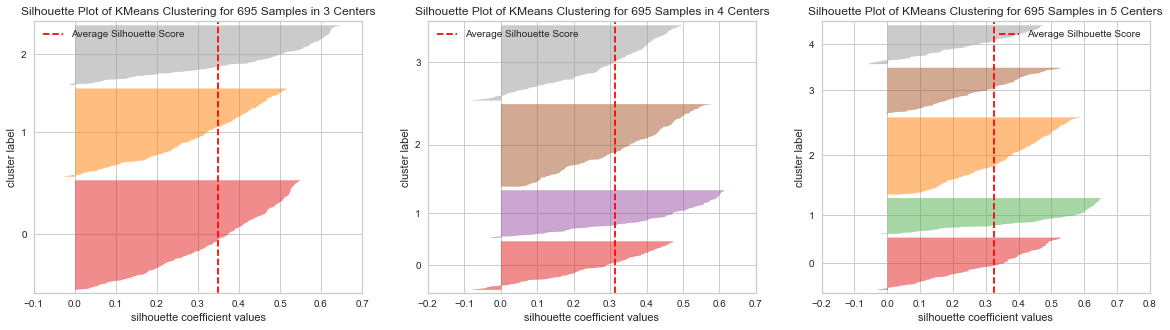

In [8]:
# # Silhouette Visualization
fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

# K-Means == 3
plt.subplot(1, 3, 1)
model = KMeans(3)
visualizer = SilhouetteVisualizer(model)
visualizer.fit(df_segmentation)    # Fit the data to the visualizer
visualizer.finalize()              # Draw/show/poof the data

# K-Means == 4
plt.subplot(1, 3, 2)
model = KMeans(4)
visualizer = SilhouetteVisualizer(model)
visualizer.fit(df_segmentation)    # Fit the data to the visualizer
visualizer.finalize()              # Draw/show/poof the data

# K-Means == 5
plt.subplot(1, 3, 3)
model = KMeans(5)
visualizer = SilhouetteVisualizer(model)
visualizer.fit(df_segmentation)    # Fit the data to the visualizer
visualizer.finalize()              # Draw/show/poof the data

In [9]:
# Choose the number of clusters based on the Elbow method on the above graphs
kmeans_pca = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)

In [10]:
# Fit our data with the K-means PCA model we have developed
kmeans_pca.fit(scores_pca);

In [11]:
# We create a new data frame with the original features and add the PCA scores and assigned clusters
df_segm_pca_kmeans = pd.concat([df_segmentation.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-7: ] = ['Component 1', 'Component 2', 'Component 3',
                                           'Component 4', 'Component 5', 'Component 6',
                                           'Component 7']
# The last column we add contains the PCA k-means clustering labels
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

#
df_segm_pca_kmeans['Segment'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'first',
                                                                              1:'second',
                                                                              2:'third',
                                                                              3:'fourth',
                                                                              4:'fifth',
                                                                              5:'sixth',
                                                                              6:'seventh'})

# Print K-means clustering with PCA results
df_segm_pca_kmeans.head()

AttributeError: 'numpy.ndarray' object has no attribute 'Reset_index'

In [ ]:
# Plot data by PCA components. The X axis is the first component, the Y axis is the second component
x_axis = df_segm_pca_kmeans['Component 1']
y_axis = df_segm_pca_kmeans['Component 2']
plt.figure(figsize = (10, 10))
qualitative_colors = sns.color_palette("Set1", 5)
sns.set_palette(qualitative_colors)
plt.axhline(y=0, color='gray', linestyle = '--')
plt.axvline(x=0, color='gray', linestyle = '--')
sns.scatterplot(x_axis, y_axis, edgecolor='black', hue = df_segm_pca_kmeans['Segment'])
plt.title('Clusters by PCA Components')
plt.show()

In [ ]:
# # PCA Biplot Function
# # #

def myplot(score, coeff, labels = None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    
    fig = plt.figure(figsize=(10,10))
    sns.scatterplot(xs * scalex, ys * scaley, hue = df_segm_pca_kmeans['Segment'],
                    edgecolor='black', alpha=.75, legend = False)
    
    ## visualize projections
    
    prop = dict(arrowstyle="-|>", color='black', shrinkA = 0, shrinkB = 0, lw=0.35, ls='-')
    
    for i in range(n):
        # arrows project features (ie columns from csv) as vectors onto PC axes
        # we can adjust length and the size of the arrow
        
        plt.annotate('', xy=(coeff[i,0] * 1.5, coeff[i,1] * 1.5), xytext=(0,0), arrowprops=prop)
        
        if labels is None:
            txt = plt.text(coeff[i,0] * 1.6, coeff[i,1] * 1.6, list(df_segmentation.columns.values)[i],
                     color = 'white', alpha = 1, ha = 'center', va = 'center', fontsize=12,
                     weight = 'normal', zorder=10)
            txt.set_path_effects([PathEffects.withStroke(linewidth=1, foreground='black')])

        else:
            plt.text(coeff[i,0] * 1.15, coeff[i,1] * 1.15, labels[i], color = 'black', ha = 'center', va = 'center')
            
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    
    plt.xlabel("Principal Component {}".format(1))
    plt.ylabel("Principal Component {}".format(2))
    plt.title('Biplot and Clusters by PCA Components')
    plt.axhline(y=0, color='gray', linestyle = '--', alpha = 0.5)
    plt.axvline(x=0, color='gray', linestyle = '--', alpha = 0.5)
    qualitative_colors = sns.color_palette("Set1", 5)
    sns.set_palette(qualitative_colors)
    plt.grid()
#     fig.savefig('LazyA.png', dpi=600)
    fig.savefig('Dix_Bexar_30.pdf')

#Call the function. Use only the 2 PCs.
myplot(scores_pca[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

In [ ]:
# #

Chemofacies = y_kmeans
X['Chemofacies'] = Chemofacies #makes a new column based on above conditional format

Y = (coredata[coredata['Outliers'] == True]) #excludes outliers
Y["Chemofacies"] = np.nan

Z=pd.concat([X, Y], ignore_index=True)

Z.to_csv (r'C:\Users\Esben Pedersen\Documents\UT Austin\MS Thesis\Geochem\Data\Z.csv', index = False, header=True)